In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree


In [ ]:
import os

file_path = "/content/bank-additional/bank-additional.csv"

if os.path.exists(file_path):
    print(f"File found at: {file_path}")
    df = pd.read_csv(file_path,
                     delimiter=';',
                     quotechar='"',
                     engine='python')
    display(df.head())
else:
    print(f"File not found at: {file_path}")

File found at: /content/bank-additional/bank-additional.csv


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
print("\nTarget Variable Distribution:\n", df['y'].value_counts())

Shape: (4119, 21)

Columns:
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Missing Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Target Variable Distribution:
 y
no     3668
yes     451
Name: count, dtype: int64


In [ ]:
# Encode all categorical columns using LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])


In [ ]:
X = df.drop('y', axis=1)   # features
y = df['y']                # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X = df.drop('y', axis=1)   # features
y = df['y']                # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.901294498381877

Confusion Matrix:
 [[1051   54]
 [  68   63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1105
           1       0.54      0.48      0.51       131

    accuracy                           0.90      1236
   macro avg       0.74      0.72      0.73      1236
weighted avg       0.90      0.90      0.90      1236



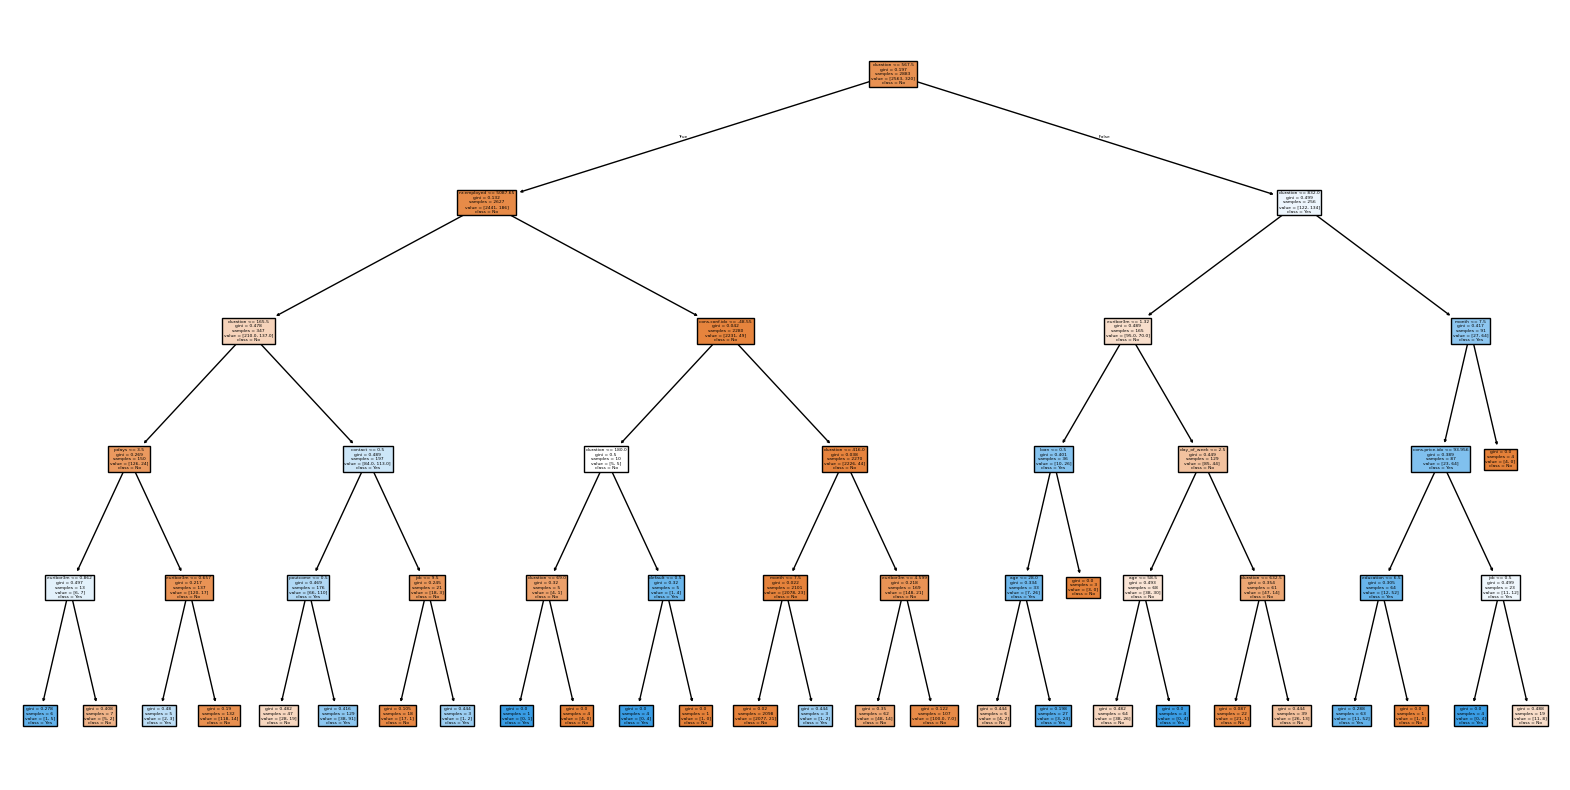

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [ ]:
dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,          # 5-fold cross-validation
                           n_jobs=-1,     # use all cores
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy on Training Set:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy on Training Set: 0.9129368861929521


In [ ]:
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Test Accuracy: 0.8988673139158576

Confusion Matrix:
 [[1049   56]
 [  69   62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      1105
           1       0.53      0.47      0.50       131

    accuracy                           0.90      1236
   macro avg       0.73      0.71      0.72      1236
weighted avg       0.89      0.90      0.90      1236



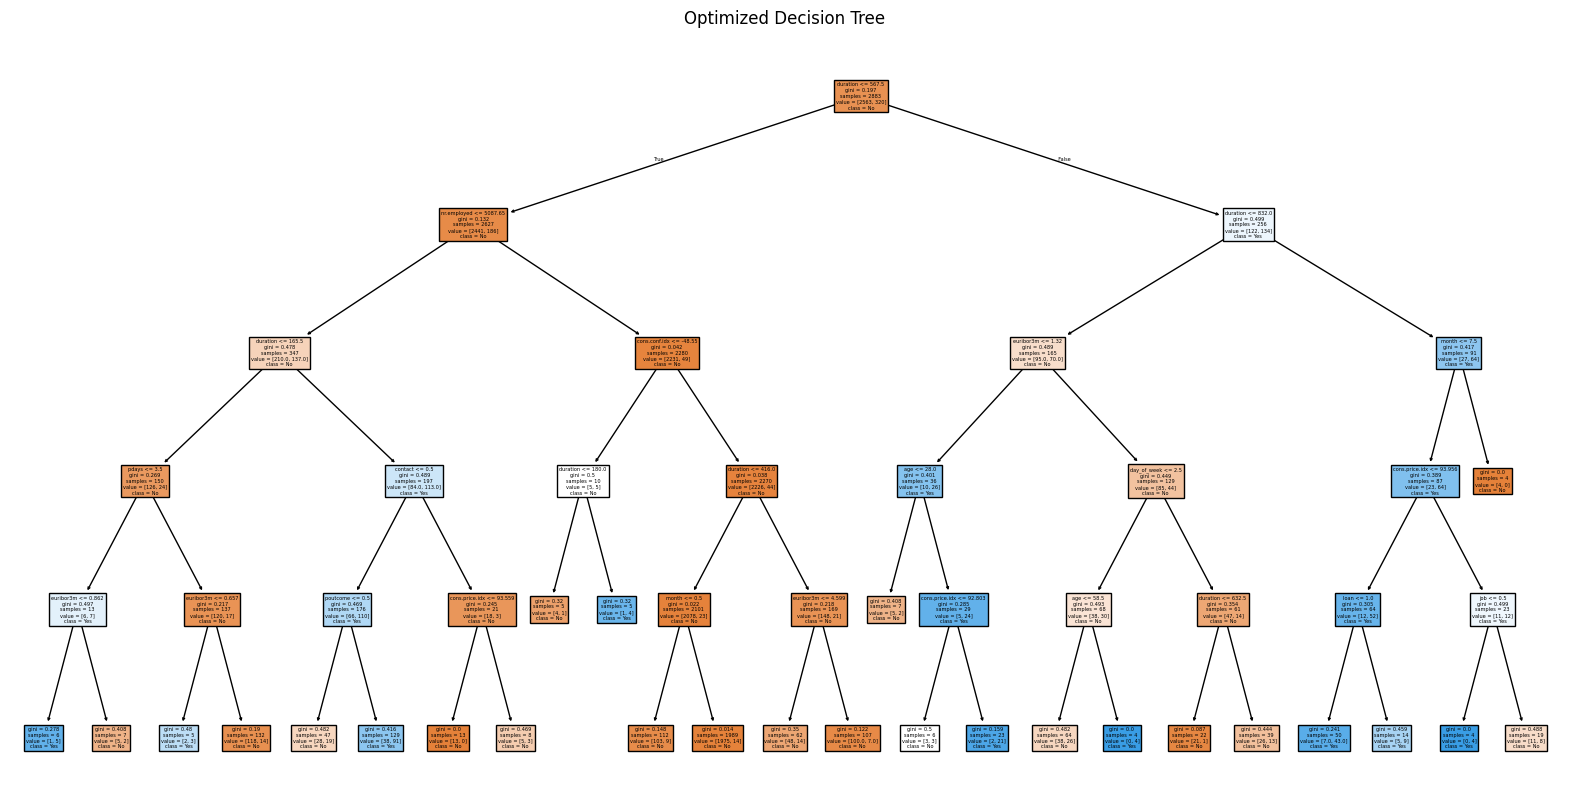

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(best_dt, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Optimized Decision Tree")
plt.show()